# Trabalho 3 - Aprendizado de Máquina

Aluno: Aíquis Rodrigues Gomes - <aiquis.gomes@eic.cefet-rj.br>

Professor: Eduardo Bezerra

O código se inicia pela parte do aprendizado de comitês pois foi a parte do trabalho disponibilizada primeiro para desenvolvimento

## 3 - Aprendizado de Comitês

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Carregando o dataset que será usado para o trabalho
x, y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y
df

,0,1,2,3,4,5,6,7,8,9,Y
0,0.176973,0.466019,0.082475,-0.194734,-0.355894,0.868253,1.318506,-0.405516,-0.060686,-1.862870,-1.0
1,-0.825504,0.429701,0.025610,0.715802,0.585692,-2.334918,-0.200560,0.918446,1.872272,-0.691987,1.0
2,-0.968831,-0.143911,-0.796177,0.576465,-1.130657,0.432769,-0.508515,2.242150,-0.316475,0.144904,-1.0
3,0.322967,-1.422643,1.026458,1.338978,1.048318,0.615579,-0.593943,0.105875,1.221895,0.483067,-1.0
4,-0.590705,0.740986,0.355655,-0.268342,1.733083,-0.641737,0.804646,0.252983,-0.509611,-1.008395,-1.0
5,1.857881,0.358666,-0.442597,-0.461008,-0.251275,-0.201795,-1.103079,0.445806,-1.251039,2.248049,1.0
6,1.090938,1.350733,0.085886,-1.257974,0.251540,0.822586,0.414076,0.199040,0.343353,0.034380,-1.0
7,-0.797595,-0.495472,0.217478,-1.954443,0.605835,-0.628086,1.600684,0.219698,-1.843278,0.339572,1.0
8,-0.667954,0.667418,0.693082,-0.369209,0.421230,-0.718417,0.304716,0.208788,-0.529898,0.776262,-1.0
9,-0.496630,-1.277537,0.106485,-1.264656,0.683678,-0.018828,0.756446,0.199506,0.933376,-0.748945,-1.0


In [2]:
# Funções auxiliares

# HELPER FUNCTION: GET ERROR RATE
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))


# HELPER FUNCTION: PRINT ERROR RATE
def print_error_rate(err):
    print ('Error rate: Training: %.4f - Test: %.4f' % err)

    
# HELPER FUNCTION: GENERIC CLASSIFIER
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train, Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), get_error_rate(pred_test, Y_test)


# ADABOOST IMPLEMENTATION
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        err_m = np.dot(w,miss) / sum(w)
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, [x * alpha_m for x in pred_test_i])]
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), get_error_rate(pred_test, Y_test)


# PLOT FUNCTION
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
    color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')
    plt.show()

In [3]:
# Split into training and test set
# Tamanho da amostra de teste corresponde à 20% dos dados
train, test = train_test_split(df, test_size = 0.2)
# Separando a matrix X de features e o target Y (última coluna dos dfs) para treinamento e teste
X_train, Y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, Y_test = test.iloc[:,:-1], test.iloc[:,-1]

passei 1
passei 2
passei 3


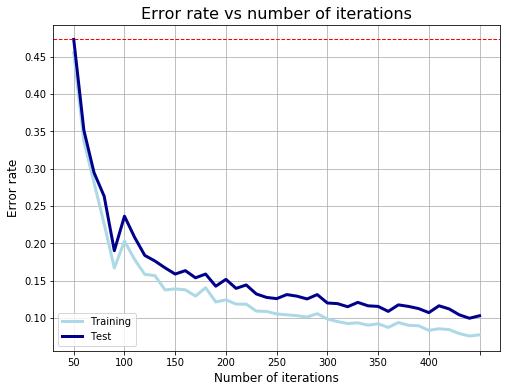

In [4]:
print('passei 1')

# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)
er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)

print('passei 2')

er_train, er_test = [er_tree[0]], [er_tree[1]]

x_range = range(10, 410, 10)
for i in x_range:
    er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
    er_train.append(er_i[0])
    er_test.append(er_i[1])
    
print('passei 3')

# Compare error rate vs number of iterations
plot_error_rate(er_train, er_test)

Como podemos ver no gráfico acima, ao utilizar o algoritmo Ada Boost implementado manualmente com uma árvore de decisão simples como classificador, começamos com uma taxa de erro bem alta, próxima dos 50%, mas que após menos de 50 iterações já cai pela metade e vai caindo até chegar a um aumento residual, terminando com menos de 10% de erro para o conjunto de treinamento e pouco mais de 10% para o conjunto de teste.

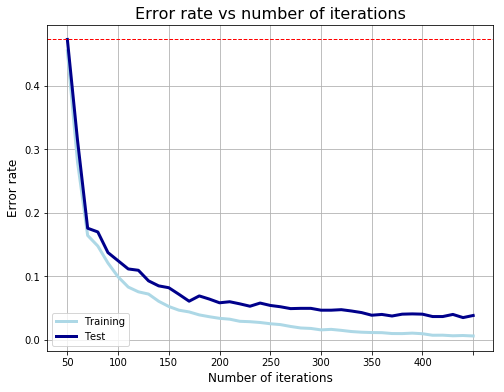

In [5]:
# Inicializando o classificador com AdaBoost e com n_estimators=1 pra ficar comparável à inicialização da Decision Tree
clf_adaboost = AdaBoostClassifier(base_estimator=clf_tree, n_estimators=1, random_state=1)
er_adaboost = generic_clf(Y_train, X_train, Y_test, X_test, clf_adaboost)
# Inicializando o vetor contendo os erros nos conjuntos de treino e validação
er_train_adaboost, er_test_adaboost = [er_adaboost[0]], [er_adaboost[1]]

# Rodando 400 iterações do classificador AdaBoost com steps de 10 como foi feito para a Decision Tree 
x_range = range(10, 410, 10)
for j in x_range:
    clf_adaboost = AdaBoostClassifier(base_estimator=clf_tree, n_estimators=j, random_state=1)
    er_j = generic_clf(Y_train, X_train, Y_test, X_test, clf_adaboost)
    er_train_adaboost.append(er_j[0])
    er_test_adaboost.append(er_j[1])

# Compare error rate vs number of iterations
plot_error_rate(er_train_adaboost, er_test_adaboost)   

Como podemos ver no gráfico acima, ao utilizar o `AdaBoostClassifier` do sklearn nós temos um erro inicial semelhante ao do algoritmo implementado na mão. No entanto, a diminuição do erro acontece muito mais rapidamente, fazendo com que chegamos na 50a iteração com um erro de 10% no conjunto de treinamento, que foi bem próximo do resultado que obtivémos após rodadas as 400 iterações no outro algoritmo. Ao final das iterações, temos uma taxa de erro bem menor do que havíamos obtido antes.
Para manter a semelhança com o que foi feito manualmente, utilizei como `base_estimator` a mesma árvore de decisão utilizada no primeiro algoritmo defini o parâmetro `random_state` como 1 para manter a mesma seed para geração dos valores.

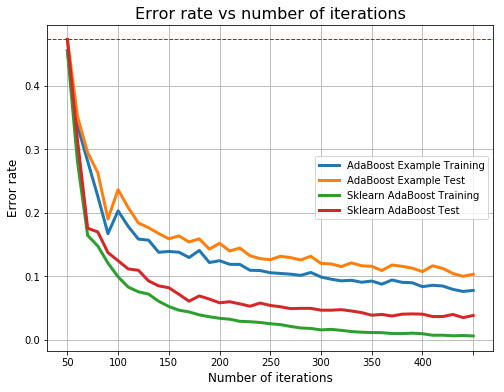

In [13]:
# Replicando a função plot_error_rate para não ter que alterá-la de forma a aceitar e processar
# mais de 2 vetores de erros

df_error_example = pd.DataFrame([er_train, er_test]).T
df_error_example.columns = ['AdaBoost Example Training', 'AdaBoost Example Test']

df_error_sklearn = pd.DataFrame([er_train_adaboost, er_test_adaboost]).T
df_error_sklearn.columns = ['Sklearn AdaBoost Training', 'Sklearn AdaBoost Test']

df_error = pd.DataFrame([er_train, er_test, er_train_adaboost, er_test_adaboost]).T
df_error.columns = ['AdaBoost Example Training', 'AdaBoost Example Test', 'Sklearn AdaBoost Training', 'Sklearn AdaBoost Test']
plot1 = df_error.plot(linewidth = 3, figsize = (8,6), grid = True)
plot1.set_xlabel('Number of iterations', fontsize = 12)
plot1.set_xticklabels(range(0,450,50))
plot1.set_ylabel('Error rate', fontsize = 12)
plot1.set_title('Error rate vs number of iterations', fontsize = 16)
plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')
plt.show()

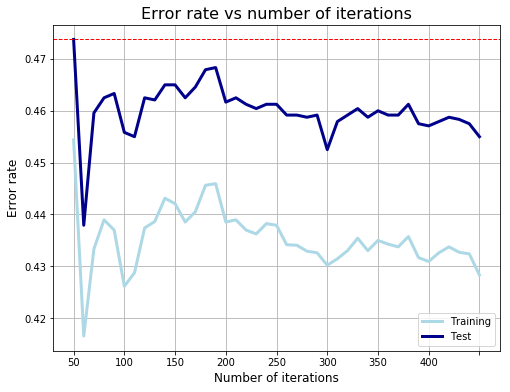

In [7]:
# Inicializando o classificador com AdaBoost e com n_estimators=1 pra ficar comparável à inicialização da Decision Tree
clf_bag = BaggingClassifier(base_estimator=clf_tree, n_estimators=1, random_state=1)
er_bag = generic_clf(Y_train, X_train, Y_test, X_test, clf_bag)
# Inicializando o vetor contendo os erros nos conjuntos de treino e validação
er_train_bag, er_test_bag = [er_bag[0]], [er_bag[1]]

# Rodando 400 iterações do classificador AdaBoost com steps de 10 como foi feito para a Decision Tree 
x_range = range(10, 410, 10)
for k in x_range:
    clf_bag = BaggingClassifier(base_estimator=clf_tree, n_estimators=k, random_state=1)
    er_k = generic_clf(Y_train, X_train, Y_test, X_test, clf_bag)
    er_train_bag.append(er_k[0])
    er_test_bag.append(er_k[1])

# Compare error rate vs number of iterations
plot_error_rate(er_train_bag, er_test_bag)   

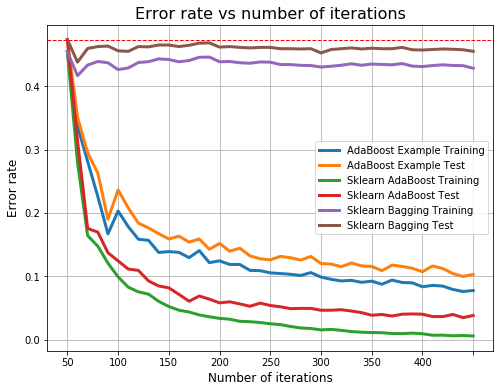

In [14]:
df_error_example = pd.DataFrame([er_train, er_test]).T
df_error_example.columns = ['AdaBoost Example Training', 'AdaBoost Example Test']

df_error_sklearn = pd.DataFrame([er_train_adaboost, er_test_adaboost]).T
df_error_sklearn.columns = ['Sklearn AdaBoost Training', 'Sklearn AdaBoost Test']

df_error_bag = pd.DataFrame([er_train_bag, er_test_bag]).T
df_error_bag.columns = ['Sklearn Bagging Training', 'Sklearn Bagging Test']

df_error = pd.DataFrame([er_train, er_test, 
                         er_train_adaboost, er_test_adaboost,
                         er_train_bag, er_test_bag]).T
df_error.columns = ['AdaBoost Example Training', 'AdaBoost Example Test',
                    'Sklearn AdaBoost Training', 'Sklearn AdaBoost Test',
                    'Sklearn Bagging Training', 'Sklearn Bagging Test']
plot1 = df_error.plot(linewidth = 3, figsize = (8,6), grid = True)
plot1.set_xlabel('Number of iterations', fontsize = 12)
plot1.set_xticklabels(range(0,450,50))
plot1.set_ylabel('Error rate', fontsize = 12)
plot1.set_title('Error rate vs number of iterations', fontsize = 16)
plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')
plt.show()

## 2 - Sistemas de Recomendação

### 2.1 - Conjunto de dados de classificação de filme

#### 2.2.1 - Função de custo da filtragem colaborativa e 2.2.2 - Gradiente de filtragem colaborativa

In [9]:
import numpy as np
import scipy.io


def cofi_cost_func(params, Y, R, num_users, num_movies, num_features, Lambda):
    # Y: num_movies x num_users: matriz de classificação de filmes por usuários
    # R: num_movies x num_users: matriz, onde R (i, j) = 1 se o i-ésimo filme
    # foi avaliado pelo j-ésimo usuário 
    # Obtém as matrizes X e Theta a partir dos params
    
    # X: num_movies x num_features: matriz de features dos filmes
    X = np.array(params[:num_movies * num_features]).reshape(
        num_features, num_movies).T.copy()
    
    # Theta: num_users x num_features: matriz de features dos usuários
    Theta = np.array(params[num_movies * num_features:]).reshape(
        num_features, num_users).T.copy()

    # Você deve retornar os seguintes valores corretamente
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)

    # 2.2.1 - Função de custo da filtragem colaborativa
    error = X.dot(Theta.T) - Y
    # Pegando apenas registros de filmes que o usuário avaliou
    error = error * R
    # Sem regularização
    J = 1 / 2 * np.sum(np.square(error))
    # Com regularização
    J += (Lambda / 2) * np.sum(np.square(X)) + (Lambda / 2) * np.sum(
        np.square(Theta))

    # 2.2.2 - Gradiente de filtragem colaborativa
    X_grad = error.dot(Theta)
    Theta_grad = error.T.dot(X)
    # Aplicando regularização
    X_grad += Lambda * X
    Theta_grad += Lambda * Theta

    grad = np.hstack((X_grad.T.flatten(), Theta_grad.T.flatten()))

    return J, grad

# Carregando dados dos filmes para o exercício
data = scipy.io.loadmat('ex8_movies.mat')
Y = data['Y']
R = data['R'].astype(bool)

# Carrega os parâmetros previamente treinados (X, Theta, num_users, num_movies, num_features)
data = scipy.io.loadmat('ex8_movieParams.mat')
X = data['X']
Theta = data['Theta']
num_users = data['num_users']
num_movies = data['num_movies']
num_features = data['num_features']

#  Reduz o conjunto de dados para que a execução seja mais rápida
num_users = 4
num_movies = 5
num_features = 3
X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

#  Avaliação da função de custo
J, grad = cofi_cost_func(np.hstack((X.T.flatten(), Theta.T.flatten())), Y, R, num_users, num_movies,
               num_features, 0)
           
print('Custo computado usando parâmetros pré-treinados: %f \n(valor deve ser próximo de 22.22)' % J)

Custo computado usando parâmetros pré-treinados: 22.224604 
(valor deve ser próximo de 22.22)


O enunciado dos exercícios dizia para implementarmos as versões não regularizadas das funções de custo e erro. No entanto, ao implementar sem a regularização, notei que os ratings que foram previstos pelo algoritmo ficavam acima do esperado (maiores que 10.0). Falei com o professor e foi dito que poderíamos implementar qualquer uma das versões (com ou sem regularização). Optei pela implementação com regularização mas mantive indicado acima no código qual parte corresponte à aplicação da regularização.

### 2.3 - Aprendizado de Recomendações para Filmes

Todo código abaixo é o `main.py` fornecido para testes dos exercícios. Optei por manter os mesmos exemplos de rating dos filmes já dados.

In [10]:
import io
from scipy.optimize import minimize


# Função para carregar a lista com os IDs dos filmes
def load_movie_list():
    """
    reads the fixed movie list in movie.txt
    and returns a cell array of the words in movieList.
    """

    ## Read the fixed movieulary list
    with io.open('movie_ids.txt', encoding='ISO-8859-1') as f:

        # Store all movies in cell array movie{}
        n = 1682  # Total number of movies 

        movieList = []
        for i in range(n):
            # Read line
            line = f.readline()
            # Word Index (can ignore since it will be = i)
            str = line.split()
            # Actual Word
            movieList.append(' '.join(str[1:]).strip())
        return movieList

movieList = load_movie_list()


# Função para normalização das avaliações dadas utilizando mean normalization
def normalize_ratings(Y, R):
    """normaliza Y de tal forma que os filmes possuam uma avaliação de 0 em média,
    and returns the mean rating in Ymean.
    """

    m, n = Y.shape
    Ymean = np.zeros(m)
    Ynorm = np.zeros(Y.shape)

    for i in range(n):
        idx = (R[i,:]==1).nonzero()[0]
        if len(idx):
            Ymean[i] = np.mean(Y[i, idx])
            Ynorm[i, idx] = Y[i, idx] - Ymean[i]
        else:
            Ymean[i] = 0.0
            Ynorm[i,idx] = 0.0

    return Ynorm, Ymean

#  Inicia o vetor de avaliações do novo usuário
my_ratings = np.zeros(1682)

# Verifique o arquivo movie_idx.txt para encontrar o id de cada filme
# Por exemplo, Toy Story (1995) tem ID 1; sendo assim, para atribuir avaliação "4", faça:
my_ratings[0] = 4

# Ou suponha que você não gostou de Silence of the Lambs (1991):
my_ratings[97] = 2

# Abaixo, são definidas as avaliações para outros filmes:
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

print('Avaliações do novo usuário:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('\tAvaliou %d para %s' % (my_ratings[i], movieList[i]))

## ================== Aprendizado de Recomendações para Filmes ====================
#  Essa seção realiza o treinamento do modelo de filtragem colaborativa usando como 
#  entrada o conjunto de dados de avaliações de filmes de 1682 filmes e 943 usuários
#

print('\nTreinamento da filtragem colaborativa...')

#  Carga dos dados
data = scipy.io.loadmat('ex8_movies.mat')
Y = data['Y']
R = data['R'].astype(bool)

#  Adiciona algumas avaliações à matriz
Y = np.column_stack((my_ratings, Y))
R = np.column_stack((my_ratings, R)).astype(bool)

#  Normaliza avaliações
Ynorm, Ymean = normalize_ratings(Y, R)

num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

# Define parâmetros iniciais (Theta, X)
X = np.random.rand(num_movies, num_features)
Theta = np.random.rand(num_users, num_features)

initial_parameters = np.hstack((X.T.flatten(), Theta.T.flatten()))

# fator de regularização
Lambda = 10

costFunc = lambda p: cofi_cost_func(p, Ynorm, R, num_users,num_movies, num_features, Lambda)[0]
gradFunc = lambda p: cofi_cost_func(p, Ynorm, R, num_users, num_movies, num_features, Lambda)[1]

result = minimize(costFunc, initial_parameters, method='CG', jac=gradFunc,
                  options={'disp': True, 'maxiter': 1000.0})
theta = result.x
cost = result.fun


# Extrai as matrizes X e Theta a partir de theta
X = theta[:num_movies * num_features].reshape(num_movies, num_features)
Theta = theta[num_movies * num_features:].reshape(num_users, num_features)

print('Aprendizado do Sistema de Recomendação finalizado.')

## ================== Realização de recomendações ====================
#  Após treinamento do modelo, é possível realizar recomendações por meio
#  da computação da matriz de predições.
#

p = X.dot(Theta.T)
my_predictions = p[:, 0] + Ymean

movieList = load_movie_list()

# ordena predições em ordem decrescente
pre=np.array([[idx, p] for idx, p in enumerate(my_predictions)])
post = pre[pre[:,1].argsort()[::-1]]
r = post[:,1]
ix = post[:,0]

print('\nRecomendações principais:')
for i in range(10):
    j = int(ix[i])
    print('\tPrevisão de avaliação %.1f para %s' % (my_predictions[j], movieList[j]))

print('\nAvaliações originais fornecidas:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('\tAvaliou %d para %s' % (my_ratings[i], movieList[i]))

Avaliações do novo usuário:
	Avaliou 4 para Toy Story (1995)
	Avaliou 3 para Twelve Monkeys (1995)
	Avaliou 5 para Usual Suspects, The (1995)
	Avaliou 4 para Outbreak (1995)
	Avaliou 5 para Shawshank Redemption, The (1994)
	Avaliou 3 para While You Were Sleeping (1995)
	Avaliou 5 para Forrest Gump (1994)
	Avaliou 2 para Silence of the Lambs, The (1991)
	Avaliou 4 para Alien (1979)
	Avaliou 5 para Die Hard 2 (1990)
	Avaliou 5 para Sphere (1998)

Treinamento da filtragem colaborativa...
Optimization terminated successfully.
         Current function value: 35118.790099
         Iterations: 338
         Function evaluations: 503
         Gradient evaluations: 503
Aprendizado do Sistema de Recomendação finalizado.

Recomendações principais:
	Previsão de avaliação 5.0 para Great Day in Harlem, A (1994)
	Previsão de avaliação 4.6 para Boot, Das (1981)
	Previsão de avaliação 4.6 para Graduate, The (1967)
	Previsão de avaliação 4.6 para Nikita (La Femme Nikita) (1990)
	Previsão de avaliação 4.